# Clean And Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment]('https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)') (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. You can find the TAFE exit survey [here]('https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey') and the survey for the DETE [here]('https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey'). We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to `UTF-8` (the original ones are encoded using `cp1252`.)
In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

| Syntax | Description |
| ----------- | ----------- |
| ID | An id used to identify the participant of the survey |
| SeparationType | The reason why the person's employment ended |
| Cease Date | The year or month the person's employment ended |
| DETE Start Date | The year the person began employment with the DETE |

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

| Syntax | Description |
| ----------- | ----------- |
| Record ID | An id used to identify the participant of the survey |
| Reason for ceasing employment | The reason why the person's employment ended |
| Cease Date | The year or month the person's employment ended |
| LengthofServiceOverall. Overall Length of Service at Institute (in years) |  The length of the person's employment (in years) |

In [1]:
import numpy as np;
import pandas as pd
# Read the differents data sets
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

Let's check some informations on our data sets

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


By the result, we can see :
- we have a lot of columns(dete_survey: 56 and tafe_survey : 72 ) in our data sets by all it's not usable for our goal. That's why we chosen the columns mentioned above. 
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

# Cleaning Data sets
## Identify missing values and Drop Unneccessary Columns

First, we'll correct the Not Stated values and drop some of the columns we don't need for our analysis.

In [4]:
#Identify missing values
dete_survey = pd.read_csv("dete_survey.csv",na_values="Not Stated")
#Drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [5]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

## Rename columns
Let's turn our attention to the columns names. Each dataframe contains many of the same columns, but the column names are different.

In [6]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(" ","_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
# Update column names to match the names in dete_survey_updated
new_columns = {'Record ID':'id','CESSATION YEAR':'cease_date','Reason for ceasing employment':'separationtype',
'Gender. What is your Gender?':'gender','CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
,'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(new_columns,axis=1)
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employmen

We renamed the columns to make the columns of the dataframes match between them.

## Filter data
Let's check the differents data of the column `separationtype` in each dataframe.

In [8]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Note that `dete_survey_updated` dataframe contains multiple separation types with the string 'Resignation'. So we should standardize it to *Resignation* 

In [10]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [11]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [12]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


## Verification of data 

In this step, we'll focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense. However, we encourage you to check the data for other issues as well!

- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [13]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [14]:
# Extract the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
# to convert the type to a float
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('float')
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [15]:
print(dete_resignations['cease_date'].value_counts().sort_index(ascending= False))
print(dete_resignations['dete_start_date'].value_counts().sort_index(ascending= False))
print(tafe_resignations['cease_date'].value_counts().sort_index(ascending= False))

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
Name: cease_date, dtype: int64
2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64
2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
Name: cease_date, dtype: int64


      id separationtype  cease_date  dete_start_date  role_start_date  \
517  518    Resignation      2010.0           2007.0           2007.0   
586  587    Resignation      2010.0           1999.0           2000.0   

         position     classification                    region business_unit  \
517  Teacher Aide                NaN              Metropolitan           NaN   
586       Teacher  Special Education  Darling Downs South West           NaN   

       employment_status  ...  work_life_balance  workload  none_of_the_above  \
517  Permanent Full-time  ...              False     False              False   
586  Permanent Part-time  ...              False     False              False   

     gender    age  aboriginal  torres_strait  south_sea  disability  nesb  
517     NaN  31-35         NaN            NaN        NaN         NaN   NaN  
586  Female  51-55         NaN            NaN        NaN         NaN   NaN  

[2 rows x 35 columns]


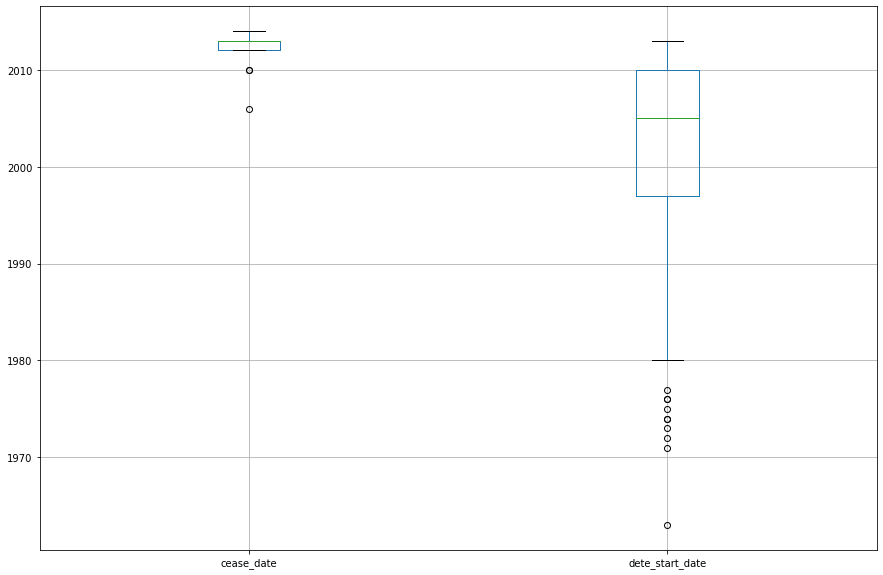

In [16]:
#Visualization
print(dete_resignations[dete_resignations['cease_date']==2010])
dete_resignations.boxplot(column=['cease_date','dete_start_date'],figsize=(15,10))

## Create new column
Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. Recall that our end goal is to answer the following question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?
In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.


In [17]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

You may have noticed that the `tafe_resignations` dataframe already contains a "service" column, which we renamed to institute_service. In order to analyze both surveys together, that's why we had created a corresponding institute_service column in `dete_resignations`.

## Identify dissatisfied employees
Let's identify any employees who resigned because they were dissatisfied. Below are the columns we'll use to categorize employees as *dissatisfied* from each dataframe.
- tafe_survey_updated:
    - Contributing Factors. Dissatisfaction,
    - Contributing Factors. Job Dissatisfaction

- detesurveyupdated:
    - job_dissatisfaction ,
    - dissatisfaction_with_the_department,
    - physical_work_environment,
    - lack_of_recognition,
    - lack_of_job_security,
    - work_location,
    - employment_conditions,
    - work_life_balance,
    - workload
    
We'll identify them and create a new column to put our result
- `True`: indicates a person resigned because they were dissatisfied with the job
- `False`: indicates a person resigned because of a reason other than dissatisfaction with the job
- `NaN`: indicates the value is missing

In [18]:
#Check unique values
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


We're creating a function to examin the data of the columns 

In [19]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
# update the columns
columns_tafe = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations[columns_tafe] = tafe_resignations[columns_tafe].applymap(update_vals)
tafe_resignations['dissatisfied'] = tafe_resignations[columns_tafe].any(1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [20]:
columns_dete = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition',
                'lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']
dete_resignations['dissatisfied'] = dete_resignations[columns_dete].any(1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)
# Copy our new dataframe
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the Data
Now, we're finally ready to combine our datasets!

In [21]:
# add a column to each dataframe that will allow us to easily distinguish between the dataframes
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
# combine our dataframe
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)

we still have some columns left in the dataframe that we don't need to complete our analysis. Let's drop any columns with less than 500 non null values

In [22]:
combined_updated = combined.dropna(axis=1,thresh=500).copy()

## Clean the service column


In [23]:
# see the different values
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


First, though, we'll have to clean up the institute_service column. To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article]('https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage'), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [24]:
# extract the years of service
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str') # convert to string
combined_updated['institute_service_up'] = combined_updated['institute_service'].str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')
combined_updated['institute_service_up'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [25]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3 :
        return 'New'
    elif 3 <= val <= 6 :
        return 'Experienced'
    elif 7 <= val <= 10 :
        return 'Established'
    else :
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(categorize)
combined_updated['service_cat'].value_counts(dropna=False)    

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

## Perform Initial Analysis
Finally, We'll fill the missing values in the `dissatisfied` column. Then, we'll calculate the percentage of employees who resigned due to dissatisfaction in each `service_cat` group and plot the results.

Note that since we still have additional missing values left to deal with, this is meant to be an initial introduction to the analysis, not the final analysis.

In [26]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

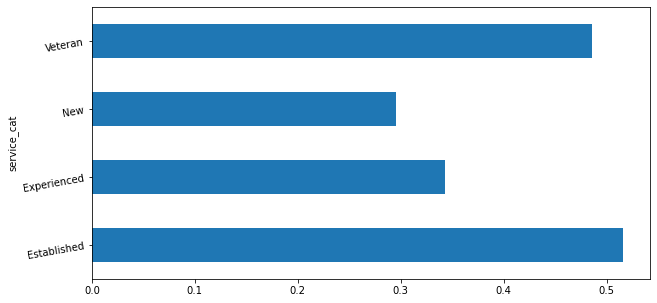

In [27]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(value=False)
# a pivot table which calcualtes the percentage of dissatisfied employees for each service category
combined_pivot = pd.pivot_table(combined_updated, index='service_cat',values='dissatisfied')
combined_pivot.plot(kind='barh',rot=10, legend=False, figsize=(10,5))

By this result we can answer to our question, the employees who resigning more is the ones that have 7 or more years than the ones that have less than 7 years.

In [28]:
# Check the different values of service_cat column
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

We have missing values ,so we must deal with it.  Based on our result on top , we'll fill the data with `Established` who are `dissatisfied = true` otherwise `New`

In [29]:
# function to fill our missing values
def categorizeNaN(val):
    if pd.isnull(val.service_cat):
        if val.dissatisfied == True :
            return 'Established'
        else:
            return 'New'
    else:
        return val.service_cat

combined_updated['service_cat'] = combined_updated[['service_cat','dissatisfied']].apply(categorizeNaN, axis=1)
combined_updated['service_cat'].value_counts(dropna=False)

New            255
Experienced    172
Veteran        136
Established     88
Name: service_cat, dtype: int64

Let's answer to this question: **How many people in each career stage resigned due to some kind of dissatisfaction?**
In our dataset `position` represent the career. 

In [30]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,institute_service_up,service_cat
0,4.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,7.0,Established
1,6.0,Resignation,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,18.0,Veteran
2,9.0,Resignation,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,3.0,Experienced
3,10.0,Resignation,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,15.0,Veteran
4,12.0,Resignation,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,3.0,Experienced


In [31]:
# we select first the employees who dissatisfied et after group by position
combined_updated[combined_updated['dissatisfied']==True].groupby('position')['position'].count()

position
Administration (AO)                                        32
Cleaner                                                    19
Executive (SES/SO)                                          2
Guidance Officer                                            3
Head of Curriculum/Head of Special Education                5
Operational (OO)                                            3
Other                                                       2
Professional Officer (PO)                                   2
Public Servant                                             18
School Administrative Staff                                 3
School Based Professional Staff (Therapist, nurse, etc)     1
Schools Officer                                             3
Teacher                                                    68
Teacher (including LVT)                                    36
Teacher Aide                                               23
Technical Officer                                           2

Now, we want to know **how many people in each age group resigned due to some kind of dissatisfaction**. For that let's clean first `age` column , categorize Ages and after reply to the question.

In [32]:
# differents value of age column
combined_updated['age'].value_counts(dropna= False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [33]:
# convert to string
combined_updated['age'] = combined_updated['age'].astype('str')
#extract the age
combined_updated['age'] = combined_updated['age'].str.extract(r'(\d+)')
combined_updated['age'] = combined_updated['age'].astype('float')
combined_updated['age'].value_counts(dropna= False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

To categorize Ages , we'll base on this [article]('https://www.institute4learning.com/resources/articles/the-12-stages-of-life/'). we'll pick 3 categories :
- Early Adulthood : 20-34
- Midlife: 35-49
- Mature Adulthood: 50-80

In [34]:
#let's drop row with missing value Age
dataAge = combined_updated.dropna().copy()
dataAge['age'].isnull().sum()

0

In [35]:

# Function to categorize the Ages 
def categorizeAge(val):
    if val < 35 :
        return 'Early Adulthood'
    elif 35 <= val < 50 :
        return 'Midlife'
    else :
        return 'Mature Adulthood'
    
#Apply the function on our dataframe
dataAge['age_cat'] = dataAge['age'].apply(categorizeAge)

# we select first the employees who dissatisfied et after group by position and count them
result = dataAge[dataAge['dissatisfied']==True].groupby('age_cat')['age_cat'].count()

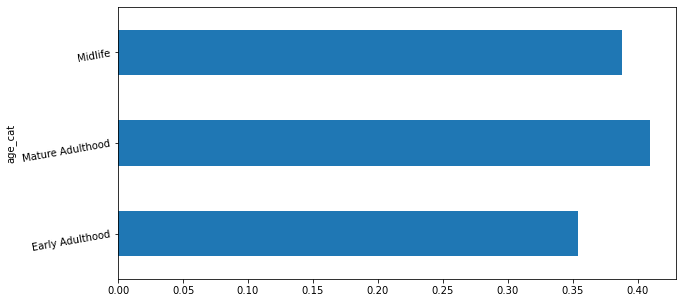

In [44]:
# a pivot table which calcualtes the percentage of dissatisfied employees for each age category
combined_pivot = pd.pivot_table(dataAge, index='age_cat',values='dissatisfied')
combined_pivot.plot(kind='barh',rot=10, legend=False, figsize=(10,5))

For the last analysis,We are going to analyze each survey separately to know **Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way.

In [37]:
combined_updated[combined_updated['dissatisfied']==True].groupby('institute')['institute'].count()

institute
DETE    149
TAFE     91
Name: institute, dtype: int64

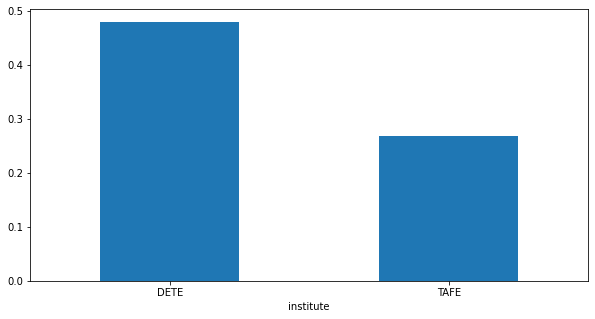

In [38]:
combined_pivot = pd.pivot_table(combined_updated, index='institute', values='dissatisfied')
combined_pivot.plot(kind='bar', rot=360, figsize=(10,5), legend=False)

We can notice by the result , the institute `DETE` have more employees who end their employement because they were dissatisfied.